In [1]:
%matplotlib notebook
import warnings
warnings.filterwarnings('ignore')
from pylj import md, sample, force

In [2]:
number_of_particles = 175
temperature = 1
number_of_steps = 1000
sample_frequency = 10

<IPython.core.display.Javascript object>


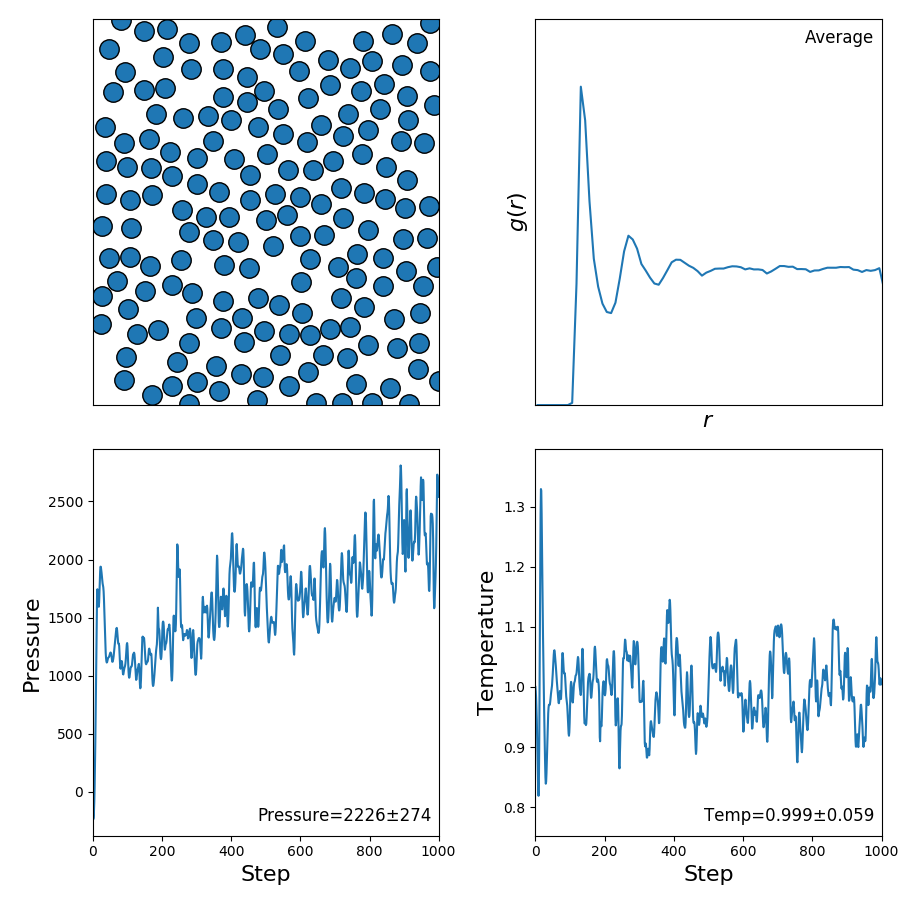

In [3]:
particles, system = md.initialise(number_of_particles, temperature)
sample_system = sample.Interactions(system)
system.time = 0
for i in range(0, number_of_steps):
    particles, system = force.compute_forces(particles, system)
    particles, system = md.update_positions(particles, system)
    system.time += system.timestep_length
    if system.step % sample_frequency == 0:
        sample_system.update(particles, system)
sample_system.average_rdf()